# BACKTEST

#### CHARGEMENT DES DONNNEE

In [1]:
import warnings
warnings.filterwarnings('ignore')


In [2]:
# -- Import --
import pandas as pd
from binance.client import Client
import ta
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# -- Define Binance Client --
client = Client()

# -- You can change the crypto pair ,the start date and the time interval below --
pairName = "ETHUSDT"
startDate = " 17 janvier 2017"
timeInterval = Client.KLINE_INTERVAL_1HOUR



# -- Load all price data from binance API --
klinesT = client.get_historical_klines(pairName, timeInterval, startDate)





# -- Define your dataset --
df = pd.DataFrame(klinesT, columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_av', 'trades', 'tb_base_av', 'tb_quote_av', 'ignore' ])
df['close'] = pd.to_numeric(df['close'])
df['high'] = pd.to_numeric(df['high'])
df['low'] = pd.to_numeric(df['low'])
df['open'] = pd.to_numeric(df['open'])

# -- Set the date to index --
df = df.set_index(df['timestamp'])
df.index = pd.to_datetime(df.index, unit='ms')
del df['timestamp']

print("Data loaded 100%")

# -- Uncomment the line below if you want to check your price dataset --
# df

Data loaded 100%


### INDICATEUR 

In [3]:
from ta.momentum import RSIIndicator,StochasticOscillator
import pandas_ta as pda

df.drop(df.columns.difference(['open','high','low','close','volume']), 1, inplace=True)

# -- Indicators, you can edit every value --
df['EMA200'] = ta.trend.ema_indicator(close=df['close'], window=200)
df['SMA500'] = df['close'].rolling(window=500).mean()
df['SMAL']=df['close'].rolling(window=7).mean()
df['SMAH']=df['close'].rolling(window=25).mean()
df['EMA120']=ta.trend.sma_indicator(df['close'], 120)

#SuperTRend
df['EMA90']=ta.trend.ema_indicator(df['close'], 90)
df['EMA50']=ta.trend.sma_indicator(df['close'], 50)
df['STOCH_RSI']=ta.momentum.stochrsi(df['close'])
ST_length = 20
ST_multiplier = 3.0
superTrend = pda.supertrend(df['high'], df['low'], df['close'], length=ST_length, multiplier=ST_multiplier)
df['SUPER_TREND'] = superTrend['SUPERT_'+str(ST_length)+"_"+str(ST_multiplier)]
df['SUPER_TREND_DIRECTION1'] = superTrend['SUPERTd_'+str(ST_length)+"_"+str(ST_multiplier)]


ST_length = 20
ST_multiplier = 4.0
superTrend = pda.supertrend(df['high'], df['low'], df['close'], length=ST_length, multiplier=ST_multiplier)
df['SUPER_TREND'] = superTrend['SUPERT_'+str(ST_length)+"_"+str(ST_multiplier)]
df['SUPER_TREND_DIRECTION2'] = superTrend['SUPERTd_'+str(ST_length)+"_"+str(ST_multiplier)]

ST_length = 40
ST_multiplier = 8.0
superTrend = pda.supertrend(df['high'], df['low'], df['close'], length=ST_length, multiplier=ST_multiplier)
df['SUPER_TREND'] = superTrend['SUPERT_'+str(ST_length)+"_"+str(ST_multiplier)]
df['SUPER_TREND_DIRECTION3'] = superTrend['SUPERTd_'+str(ST_length)+"_"+str(ST_multiplier)]

# -- Trix Indicator --
trixLength = 9
trixSignal = 21
df['TRIX'] = ta.trend.ema_indicator(ta.trend.ema_indicator(ta.trend.ema_indicator(close=df['close'], window=trixLength), window=trixLength), window=trixLength)
df['TRIX_PCT'] = df["TRIX"].pct_change()*100
df['TRIX_SIGNAL'] = ta.trend.sma_indicator(df['TRIX_PCT'],trixSignal)
df['TRIX_HISTO'] = df['TRIX_PCT'] - df['TRIX_SIGNAL']

# -- Stochastic RSI --
df['STOCH_RSI'] = ta.momentum.stochrsi(close=df['close'], window=13, smooth1=3, smooth2=3)
# -- Stochastic Oscillator %K and %D --
stoch = StochasticOscillator(high=df['high'], low=df['low'], close=df['close'], window=14, smooth_window=3)
df['%K'] = stoch.stoch()
df['%D'] = stoch.stoch_signal()


# -- RSI --
df['RSI'] = RSIIndicator(close=df['close'], window=14).rsi()

print("Indicators loaded 100%")
df.head(500)


Indicators loaded 100%


,open,high,low,close,volume,EMA200,SMA500,SMAL,SMAH,EMA120,...,SUPER_TREND_DIRECTION1,SUPER_TREND_DIRECTION2,SUPER_TREND_DIRECTION3,TRIX,TRIX_PCT,TRIX_SIGNAL,TRIX_HISTO,%K,%D,RSI
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-08-17 04:00:00,301.13,302.57,298.00,301.61,125.66877000,NaN,NaN,NaN,NaN,NaN,...,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-17 05:00:00,301.61,303.28,300.00,303.10,377.67246000,NaN,NaN,NaN,NaN,NaN,...,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-17 06:00:00,302.40,304.44,301.90,302.68,303.86672000,NaN,NaN,NaN,NaN,NaN,...,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-17 07:00:00,302.68,307.96,302.60,307.96,754.74510000,NaN,NaN,NaN,NaN,NaN,...,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-17 08:00:00,307.95,309.97,307.00,308.62,150.75029000,NaN,NaN,NaN,NaN,NaN,...,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-07 01:00:00,332.25,332.25,320.35,321.82,178.39780000,331.997448,NaN,330.051429,324.3400,325.963500,...,1,1,-1,323.728417,0.284172,0.451224,-0.167052,32.715477,69.184430,49.967004
2017-09-07 02:00:00,321.82,328.98,321.08,325.20,264.74021000,331.929812,NaN,330.038571,324.6176,325.436083,...,1,1,-1,324.495135,0.236840,0.436127,-0.199288,47.797563,53.853436,52.398269
2017-09-07 03:00:00,325.91,329.72,325.91,326.59,123.41003000,331.876680,NaN,330.122857,324.9616,324.923250,...,1,1,-1,325.121755,0.193106,0.418201,-0.225095,43.706697,41.406579,53.401114


In [4]:

def createMACD(df):
    # Compute the 12-day and 26-day exponential moving averages (EMAs)
    e12 = ta.trend.ema_indicator(close=df['close'], window=12)
    e26 = ta.trend.ema_indicator(close=df['close'], window=26)

    # Compute the MACD line as the difference between the 12-day and 26-day EMAs
    macd_line = e12 - e26

    # Compute the 9-day EMA of the MACD line to generate the signal line
    signal_line = ta.trend.ema_indicator(close=macd_line, window=9)

    # Compute the MACD histogram as the difference between the MACD line and the signal line
    macd_histogram = macd_line - signal_line

    # Add the computed MACD values to the DataFrame
    df['e12'] = e12
    df['e26'] = e26
    df['MACD'] = macd_line
    df['MACD_SIGNAL'] = signal_line
    df['MACD_HISTOGRAM'] = macd_histogram

    return df
df = createMACD(df)
df

,open,high,low,close,volume,EMA200,SMA500,SMAL,SMAH,EMA120,...,TRIX_SIGNAL,TRIX_HISTO,%K,%D,RSI,e12,e26,MACD,MACD_SIGNAL,MACD_HISTOGRAM
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-08-17 04:00:00,301.13,302.57,298.00,301.61,125.66877000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-17 05:00:00,301.61,303.28,300.00,303.10,377.67246000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-17 06:00:00,302.40,304.44,301.90,302.68,303.86672000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-17 07:00:00,302.68,307.96,302.60,307.96,754.74510000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-17 08:00:00,307.95,309.97,307.00,308.62,150.75029000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-21 09:00:00,1920.68,1926.37,1916.08,1921.35,13831.03540000,2003.475235,1932.92060,1927.194286,1941.3448,2034.745417,...,-0.054078,-0.017446,39.395984,43.000956,39.299097,1930.916507,1942.012831,-11.096324,-10.660329,-0.435996
2023-04-21 10:00:00,1921.34,1927.13,1908.90,1912.88,16881.37630000,2002.573790,1933.07290,1922.490000,1939.6156,2033.269750,...,-0.054528,-0.024488,25.105450,34.250042,36.249565,1928.141659,1939.854844,-11.713184,-10.870900,-0.842284
2023-04-21 11:00:00,1912.87,1914.97,1902.25,1909.01,24334.84260000,2001.642807,1933.22972,1918.275714,1937.8416,2031.791250,...,-0.056399,-0.030979,18.576008,27.692481,34.916375,1925.198327,1937.570040,-12.371713,-11.171063,-1.200651


In [5]:
import pandas as pd
import numpy as np
from ta.volatility import BollingerBands

# Bollinger Bands
bollinger_window = 21
bb_ecart_type = 2.25
indicator_bb = BollingerBands(close=df['close'], window=bollinger_window, window_dev=bb_ecart_type)
df['BB_MIDDLE'] = indicator_bb.bollinger_mavg()
df['BB_UPPER'] = indicator_bb.bollinger_hband()
df['BB_LOWER'] = indicator_bb.bollinger_lband()

bb_pct = indicator_bb.bollinger_pband()
df['BB_Ecart_Type'] = bb_pct.rolling(window=bollinger_window).std() 

df


,open,high,low,close,volume,EMA200,SMA500,SMAL,SMAH,EMA120,...,RSI,e12,e26,MACD,MACD_SIGNAL,MACD_HISTOGRAM,BB_MIDDLE,BB_UPPER,BB_LOWER,BB_Ecart_Type
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-08-17 04:00:00,301.13,302.57,298.00,301.61,125.66877000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-17 05:00:00,301.61,303.28,300.00,303.10,377.67246000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-17 06:00:00,302.40,304.44,301.90,302.68,303.86672000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-17 07:00:00,302.68,307.96,302.60,307.96,754.74510000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-17 08:00:00,307.95,309.97,307.00,308.62,150.75029000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-21 09:00:00,1920.68,1926.37,1916.08,1921.35,13831.03540000,2003.475235,1932.92060,1927.194286,1941.3448,2034.745417,...,39.299097,1930.916507,1942.012831,-11.096324,-10.660329,-0.435996,1938.675714,1970.612559,1906.738869,0.176853
2023-04-21 10:00:00,1921.34,1927.13,1908.90,1912.88,16881.37630000,2002.573790,1933.07290,1922.490000,1939.6156,2033.269750,...,36.249565,1928.141659,1939.854844,-11.713184,-10.870900,-0.842284,1935.855714,1965.364961,1906.346468,0.160186
2023-04-21 11:00:00,1912.87,1914.97,1902.25,1909.01,24334.84260000,2001.642807,1933.22972,1918.275714,1937.8416,2031.791250,...,34.916375,1925.198327,1937.570040,-12.371713,-11.171063,-1.200651,1933.037143,1960.461916,1905.612370,0.144940


### Strat Bollinger template

In [6]:
dfTest = df.copy()

# -- If you want to run your BackTest on a specific period, uncomment the line below --
# dfTest = df['2021-09-01':]

# -- Definition of dt, that will be the dataset to do your trades analyses --
dt = None
dt = pd.DataFrame(columns = ['date','position', 'reason', 'price', 'frais' ,'fiat', 'coins', 'wallet', 'drawBack'])

# -- You can change variables below --
usdt = 1000
makerFee = 0.001
takerFee = 0.001

# -- Do not touch these values --
initalWallet = usdt
wallet = usdt
coin = 0
lastAth = 0
previousRow = dfTest.iloc[0]
stopLoss = 0
takeProfit = 500000
buyReady = True
sellReady = True

# -- Condition to BUY market --
def buyCondition(row, previousRow):
  if  row['close'] > row['SMA500'] and row['close'] > row['BB_UPPER'] and (row['BB_UPPER'] - row['BB_LOWER']) > df['BB_Ecart_Type'].iloc[-1]:
    return True
  else:
    return False

# -- Condition to SELL market --  
def sellCondition(row, previousRow):
  if row['close'] < row['SMA500'] and row['close'] < row['BB_LOWER'] and (row['BB_UPPER'] - row['BB_LOWER']) > df['BB_Ecart_Type'].iloc[-1]:
    return True
  else:
    return False

# -- Iteration on all your price dataset (df) --
for index, row in dfTest.iterrows():
  # -- Buy market order --
  if buyCondition(row, previousRow) and usdt > 0 and buyReady == True:
    # -- You can define here at what price you buy --
    buyPrice = row['close']

    # -- Define the price of you SL and TP or comment it if you don't want a SL or TP --
    #stopLoss = buyPrice - 0.1*buyPrice
    #takeProfit = buyPrice + 0.302 * buyPrice

    coin = usdt / buyPrice
    fee = takerFee * coin
    coin = coin - fee
    usdt = 0
    wallet = coin * row['close']

    # -- Check if your wallet hit a new ATH to know the drawBack --
    if wallet > lastAth:
      lastAth = wallet

    # -- You can uncomment the line below if you want to see logs --
    # print("Buy COIN at",buyPrice,'$ the', index)

    # -- Add the trade to DT to analyse it later --
    myrow = {'date': index, 'position': "Buy", 'reason':'Buy Market Order','price': buyPrice,'frais': fee * row['close'],'fiat': usdt,'coins': coin,'wallet': wallet,'drawBack':(wallet-lastAth)/lastAth}
    dt = dt.append(myrow,ignore_index=True)
  
  #Stop Loss
  elif row['low'] < stopLoss and coin > 0:

    sellPrice = stopLoss

    usdt = coin * sellPrice
    fee = makerFee * usdt
    usdt = usdt - fee
    coin = 0
    buyReady = True
    wallet = usdt
    if wallet > lastAth:
      lastAth = wallet
    # print("Sell COIN at Stop Loss",sellPrice,'$ the', index)
    myrow = {'date': index,'position': "Sell", 'reason': 'Sell Stop Loss', 'price': sellPrice, 'frais': fee, 'fiat': usdt, 'coins': coin, 'wallet': wallet, 'drawBack':(wallet-lastAth)/lastAth}
    dt = dt.append(myrow,ignore_index=True)

  #Take Profit
  elif row['high'] > takeProfit and coin > 0:

    sellPrice = takeProfit

    usdt = coin * sellPrice
    fee = makerFee * usdt
    usdt = usdt - fee
    coin = 0
    buyReady = True
    wallet = usdt
    if wallet > lastAth:
      lastAth = wallet
    # print("Sell COIN at Take Profit Loss",sellPrice,'$ the', index)
    myrow = {'date': index,'position': "Sell", 'reason': 'Sell Take Profit', 'price': sellPrice, 'frais': fee, 'fiat': usdt, 'coins': coin, 'wallet': wallet, 'drawBack':(wallet-lastAth)/lastAth}
    dt = dt.append(myrow,ignore_index=True)     

    # -- Check if your wallet hit a new ATH to know the drawBack --
    if wallet > lastAth:
      lastAth = wallet
      
    # -- You can uncomment the line below if you want to see logs --
    # print("Sell COIN at Stop Loss",sellPrice,'$ the', index)

    # -- Add the trade to DT to analyse it later --
    myrow = {'date': index,'position': "Sell", 'reason':'Sell Stop Loss','price': sellPrice,'frais': fee,'fiat': usdt,'coins': coin,'wallet': wallet,'drawBack':(wallet-lastAth)/lastAth}
    dt = dt.append(myrow,ignore_index=True)    

  # -- Sell Market Order --
  elif sellCondition(row, previousRow) and coin > 0 and sellReady == True:

    # -- You can define here at what price you buy --
    sellPrice = row['close']
    usdt = coin * sellPrice
    fee = takerFee * usdt
    usdt = usdt - fee
    coin = 0
    buyReady = True
    wallet = usdt

    # -- Check if your wallet hit a new ATH to know the drawBack --
    if wallet > lastAth:
      lastAth = wallet

    # -- You can uncomment the line below if you want to see logs --  
    # print("Sell COIN at",sellPrice,'$ the', index)

    # -- Add the trade to DT to analyse it later --
    myrow = {'date': index,'position': "Sell", 'reason':'Sell Market Order','price': sellPrice,'frais': fee,'fiat': usdt,'coins': coin,'wallet': wallet,'drawBack':(wallet-lastAth)/lastAth}
    dt = dt.append(myrow,ignore_index=True)
  
  previousRow = row

# -- BackTest Analyses --
dt = dt.set_index(dt['date'])
dt.index = pd.to_datetime(dt.index)
dt['resultat'] = dt['wallet'].diff()
dt['resultat%'] = dt['wallet'].pct_change()*100
dt.loc[dt['position']=='Buy','resultat'] = None
dt.loc[dt['position']=='Buy','resultat%'] = None

dt['tradeIs'] = ''
dt.loc[dt['resultat']>0,'tradeIs'] = 'Good'
dt.loc[dt['resultat']<=0,'tradeIs'] = 'Bad'

iniClose = dfTest.iloc[0]['close']
lastClose = dfTest.iloc[len(dfTest)-1]['close']
holdPercentage = ((lastClose - iniClose)/iniClose) * 100
algoPercentage = ((wallet - initalWallet)/initalWallet) * 100
vsHoldPercentage = ((algoPercentage - holdPercentage)/holdPercentage) * 100

try:
    tradesPerformance = round(dt.loc[(dt['tradeIs'] == 'Good') | (dt['tradeIs'] == 'Bad'), 'resultat%'].sum()
            / dt.loc[(dt['tradeIs'] == 'Good') | (dt['tradeIs'] == 'Bad'), 'resultat%'].count(), 2)
except:
    tradesPerformance = 0
    print("/!\ There is no Good or Bad Trades in your BackTest, maybe a problem...")

try:
    totalGoodTrades = dt.groupby('tradeIs')['date'].nunique()['Good']
    AveragePercentagePositivTrades = round(dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].sum()
                                           / dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].count(), 2)
    idbest = dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].idxmax()
    bestTrade = str(
        round(dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].max(), 2))
except:
    totalGoodTrades = 0
    AveragePercentagePositivTrades = 0
    idbest = ''
    bestTrade = 0
    print("/!\ There is no Good Trades in your BackTest, maybe a problem...")

try:
    totalBadTrades = dt.groupby('tradeIs')['date'].nunique()['Bad']
    AveragePercentageNegativTrades = round(dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].sum()
                                           / dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].count(), 2)
    idworst = dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].idxmin()
    worstTrade = round(dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].min(), 2)
except:
    totalBadTrades = 0
    AveragePercentageNegativTrades = 0
    idworst = ''
    worstTrade = 0
    print("/!\ There is no Bad Trades in your BackTest, maybe a problem...")

totalTrades = totalBadTrades + totalGoodTrades
winRateRatio = (totalGoodTrades/totalTrades) * 100

reasons = dt['reason'].unique()

dt

,date,position,reason,price,frais,fiat,coins,wallet,drawBack,resultat,resultat%,tradeIs
date,,,,,,,,,,,,
2017-09-25 04:00:00,2017-09-25 04:00:00,Buy,Buy Market Order,290.85,1.000000,0,3.434760,999.000000,0.000000,NaN,NaN,
2017-09-29 03:00:00,2017-09-29 03:00:00,Sell,Sell Market Order,280.00,0.961733,960.771119,0.000000,960.771119,-0.038267,-38.228881,-3.826715,Bad
2017-09-30 03:00:00,2017-09-30 03:00:00,Buy,Buy Market Order,302.01,0.960771,0,3.178075,959.810348,-0.039229,NaN,NaN,
2017-10-09 18:00:00,2017-10-09 18:00:00,Sell,Sell Market Order,291.76,0.927235,926.307847,0.000000,926.307847,-0.072765,-33.502501,-3.490533,Bad
2017-10-12 02:00:00,2017-10-12 02:00:00,Buy,Buy Market Order,307.87,0.926308,0,3.005754,925.381539,-0.073692,NaN,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-24 15:00:00,2023-02-24 15:00:00,Sell,Sell Market Order,1602.94,80.817314,80736.496768,0.000000,80736.496768,-0.053811,-3562.192498,-4.225680,Bad
2023-02-26 18:00:00,2023-02-26 18:00:00,Buy,Buy Market Order,1630.00,80.736497,0,49.482062,80655.760271,-0.054757,NaN,NaN,
2023-02-28 21:00:00,2023-02-28 21:00:00,Sell,Sell Market Order,1605.19,79.428110,79348.682215,0.000000,79348.682215,-0.070075,-1307.078057,-1.620564,Bad


### Analyse


In [7]:
print("Pair Symbol :",pairName)
print("Period : [" + str(dfTest.index[0]) + "] -> [" +
      str(dfTest.index[len(dfTest)-1]) + "]")
print("Starting balance :", initalWallet, "$")

print("\n----- General Informations -----")
print("Final balance :", round(wallet, 2), "$")
print("Performance vs US Dollar :", round(algoPercentage, 2), "%")
print("Buy and Hold Performence :", round(holdPercentage, 2), "%")
print("Performance vs Buy and Hold :", round(vsHoldPercentage, 2), "%")
print("Best trade : +"+bestTrade, "%, the", idbest)
print("Worst trade :", worstTrade, "%, the", idworst)
print("Worst drawBack :", str(100*round(dt['drawBack'].min(), 2)), "%")
print("Total fees : ", round(dt['frais'].sum(), 2), "$")

print("\n----- Trades Informations -----")
print("Total trades on period :",totalTrades)
print("Number of positive trades :", totalGoodTrades)
print("Number of negative trades : ", totalBadTrades)
print("Trades win rate ratio :", round(winRateRatio, 2), '%')
print("Average trades performance :",tradesPerformance,"%")
print("Average positive trades :", AveragePercentagePositivTrades, "%")
print("Average negative trades :", AveragePercentageNegativTrades, "%")
diff = dfTest.index[len(dfTest)-1] - dfTest.index[0]
jours = diff.days
print("nombre de trade par jours potentiel :", totalTrades/jours)
      
print("\n----- Trades Reasons -----")
reasons = dt['reason'].unique()
for r in reasons:
    print(r+" number :", dt.groupby('reason')['date'].nunique()[r])

Pair Symbol : ETHUSDT
Period : [2017-08-17 04:00:00] -> [2023-04-21 13:00:00]
Starting balance : 1000 $

----- General Informations -----
Final balance : 93741.09 $
Performance vs US Dollar : 9274.11 %
Buy and Hold Performence : 535.02 %
Performance vs Buy and Hold : 1633.42 %
Best trade : +86.78 %, the 2020-02-25 16:00:00
Worst trade : -12.91 %, the 2018-09-25 06:00:00
Worst drawBack : -37.0 %
Total fees :  5259.89 $

----- Trades Informations -----
Total trades on period : 110
Number of positive trades : 32
Number of negative trades :  78
Trades win rate ratio : 29.09 %
Average trades performance : 5.7 %
Average positive trades : 28.26 %
Average negative trades : -3.56 %
nombre de trade par jours potentiel : 0.05306319343945972

----- Trades Reasons -----
Buy Market Order number : 110
Sell Market Order number : 110



----- Plot -----


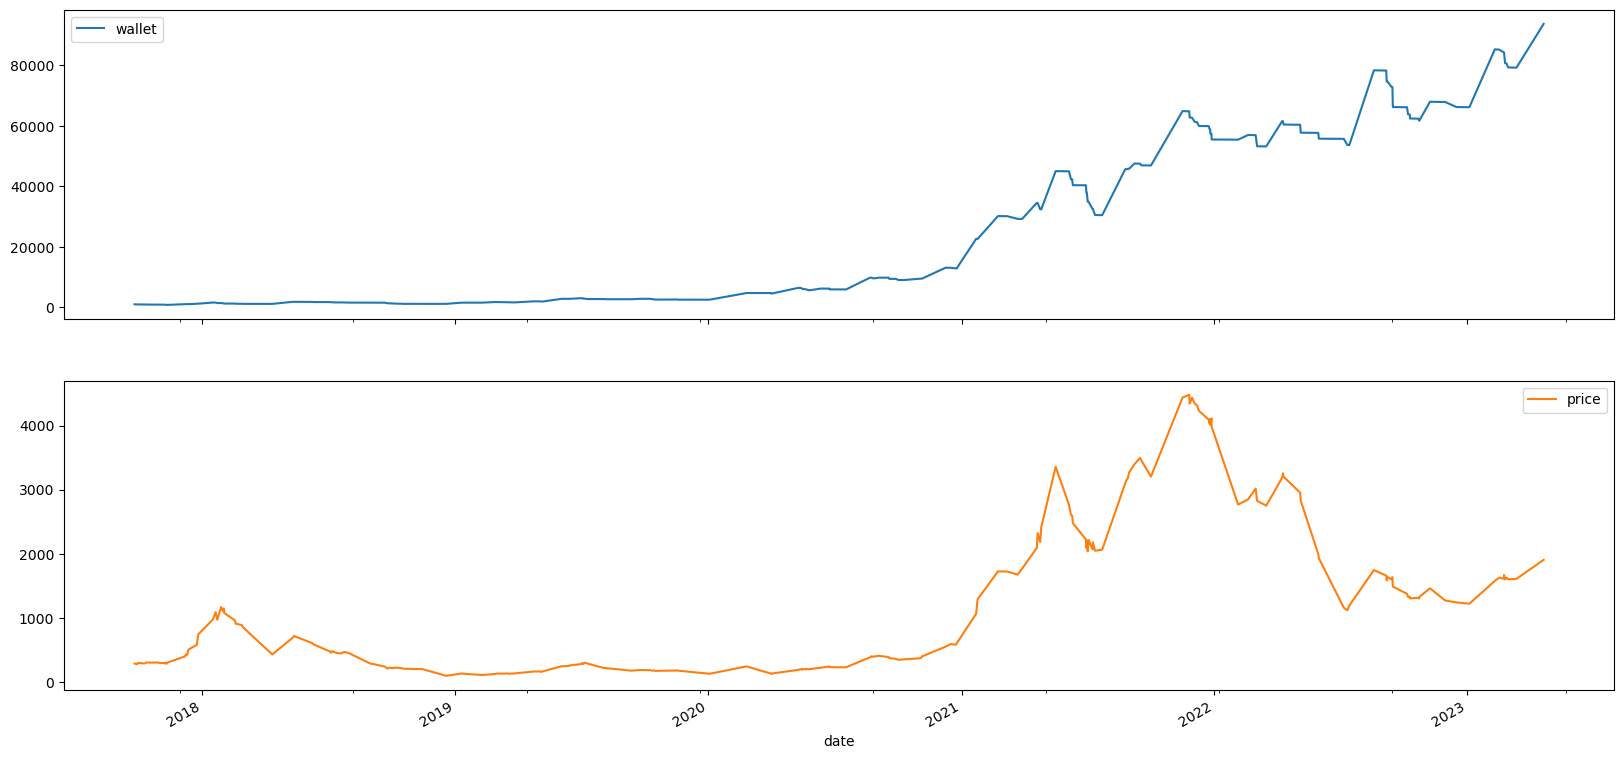

In [8]:

dt[['wallet', 'price']].plot(subplots=True, figsize=(20, 10))
print("\n----- Plot -----")

### FORMULE TRIX


In [9]:
#Formule Trix

dfTest = df.copy()

# -- If you want to run your BackTest on a specific period, uncomment the line below --
#dfTest = df['2023-01-20':]

# -- Definition of dt, that will be the dataset to do your trades analyses --
dt = None
dt = pd.DataFrame(columns = ['date','position', 'reason', 'price', 'frais' ,'fiat', 'coins', 'wallet', 'drawBack'])

# -- You can change variables below --
usdt = 1000
makerFee = 0.001
takerFee = 0.001

# -- Do not touch these values --
initalWallet = usdt
wallet = usdt
coin = 0
lastAth = 0
previousRow = dfTest.iloc[0]
stopLoss = 0
takeProfit = 500000
buyReady = True
sellReady = True

# -- Condition to BUY market --
def buyCondition(row, previousRow):
    if row['TRIX_HISTO'] > 0 and row['STOCH_RSI'] >0.25:
        return True
    else:
        return False

def sellCondition(row, previousRow):
    if row['TRIX_HISTO'] < 0 and row['STOCH_RSI'] < 0.86:
        return True
    else:
        return False

# -- Iteration on all your price dataset (df) --
for index, row in dfTest.iterrows():
  # -- Buy market order --
  if buyCondition(row, previousRow) and usdt > 0 and buyReady == True:
    # -- You can define here at what price you buy --
    buyPrice = row['close']

    # -- Define the price of you SL and TP or comment it if you don't want a SL or TP --
   # stopLoss = buyPrice - 0.2 * buyPrice
   # takeProfit = buyPrice + 0.15 * buyPrice

    coin = usdt / buyPrice
    fee = takerFee * coin
    coin = coin - fee
    usdt = 0
    wallet = coin * row['close']

    # -- Check if your wallet hit a new ATH to know the drawBack --
    if wallet > lastAth:
      lastAth = wallet

    # -- You can uncomment the line below if you want to see logs --
    # print("Buy COIN at",buyPrice,'$ the', index)

    # -- Add the trade to DT to analyse it later --
    myrow = {'date': index, 'position': "Buy", 'reason':'Buy Market Order','price': buyPrice,'frais': fee * row['close'],'fiat': usdt,'coins': coin,'wallet': wallet,'drawBack':(wallet-lastAth)/lastAth}
    dt = dt.append(myrow,ignore_index=True)
  
  # -- Stop Loss --

    # -- Check if your wallet hit a new ATH to know the drawBack --
    if wallet > lastAth:
      lastAth = wallet
      
    # -- You can uncomment the line below if you want to see logs --
    # print("Sell COIN at Stop Loss",sellPrice,'$ the', index)
 

  # -- Sell Market Order --
  elif sellCondition(row, previousRow) and coin > 0 and sellReady == True:

    # -- You can define here at what price you buy --
    sellPrice = row['close']
    usdt = coin * sellPrice
    fee = takerFee * usdt
    usdt = usdt - fee
    coin = 0
    buyReady = True
    wallet = usdt

    # -- Check if your wallet hit a new ATH to know the drawBack --
    if wallet > lastAth:
      lastAth = wallet

    # -- You can uncomment the line below if you want to see logs --  
    # print("Sell COIN at",sellPrice,'$ the', index)

    # -- Add the trade to DT to analyse it later --
    myrow = {'date': index,'position': "Sell", 'reason':'Sell Market Order','price': sellPrice,'frais': fee,'fiat': usdt,'coins': coin,'wallet': wallet,'drawBack':(wallet-lastAth)/lastAth}
    dt = dt.append(myrow,ignore_index=True)
  
  previousRow = row

# -- BackTest Analyses --
dt = dt.set_index(dt['date'])
dt.index = pd.to_datetime(dt.index)
dt['resultat'] = dt['wallet'].diff()
dt['resultat%'] = dt['wallet'].pct_change()*100
dt.loc[dt['position']=='Buy','resultat'] = None
dt.loc[dt['position']=='Buy','resultat%'] = None

dt['tradeIs'] = ''
dt.loc[dt['resultat']>0,'tradeIs'] = 'Good'
dt.loc[dt['resultat']<=0,'tradeIs'] = 'Bad'

iniClose = dfTest.iloc[0]['close']
lastClose = dfTest.iloc[len(dfTest)-1]['close']
holdPercentage = ((lastClose - iniClose)/iniClose) * 100
algoPercentage = ((wallet - initalWallet)/initalWallet) * 100
vsHoldPercentage = ((algoPercentage - holdPercentage)/holdPercentage) * 100

try:
    tradesPerformance = round(dt.loc[(dt['tradeIs'] == 'Good') | (dt['tradeIs'] == 'Bad'), 'resultat%'].sum()
            / dt.loc[(dt['tradeIs'] == 'Good') | (dt['tradeIs'] == 'Bad'), 'resultat%'].count(), 2)
except:
    tradesPerformance = 0
    print("/!\ There is no Good or Bad Trades in your BackTest, maybe a problem...")

try:
    totalGoodTrades = dt.groupby('tradeIs')['date'].nunique()['Good']
    AveragePercentagePositivTrades = round(dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].sum()
                                           / dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].count(), 2)
    idbest = dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].idxmax()
    bestTrade = str(
        round(dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].max(), 2))
except:
    totalGoodTrades = 0
    AveragePercentagePositivTrades = 0
    idbest = ''
    bestTrade = 0
    print("/!\ There is no Good Trades in your BackTest, maybe a problem...")

try:
    totalBadTrades = dt.groupby('tradeIs')['date'].nunique()['Bad']
    AveragePercentageNegativTrades = round(dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].sum()
                                           / dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].count(), 2)
    idworst = dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].idxmin()
    worstTrade = round(dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].min(), 2)
except:
    totalBadTrades = 0
    AveragePercentageNegativTrades = 0
    idworst = ''
    worstTrade = 0
    print("/!\ There is no Bad Trades in your BackTest, maybe a problem...")

totalTrades = totalBadTrades + totalGoodTrades
winRateRatio = (totalGoodTrades/totalTrades) * 100

reasons = dt['reason'].unique()

dt

,date,position,reason,price,frais,fiat,coins,wallet,drawBack,resultat,resultat%,tradeIs
date,,,,,,,,,,,,
2017-08-19 16:00:00,2017-08-19 16:00:00,Buy,Buy Market Order,286.14,1.000000,0,3.491298,999.000000,0.000000,NaN,NaN,
2017-08-21 21:00:00,2017-08-21 21:00:00,Sell,Sell Market Order,326.79,1.140921,1139.780341,0.000000,1139.780341,0.000000,140.780341,14.092126,Good
2017-08-22 16:00:00,2017-08-22 16:00:00,Buy,Buy Market Order,317.74,1.139780,0,3.583561,1138.640561,-0.001000,NaN,NaN,
2017-08-23 16:00:00,2017-08-23 16:00:00,Sell,Sell Market Order,318.85,1.142618,1141.475695,0.000000,1141.475695,0.000000,2.835134,0.248993,Good
2017-08-24 11:00:00,2017-08-24 11:00:00,Buy,Buy Market Order,323.61,1.141476,0,3.523792,1140.334219,-0.001000,NaN,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-17 04:00:00,2023-04-17 04:00:00,Sell,Sell Market Order,2098.60,94.617081,94522.463891,0.000000,94522.463891,-0.246592,-72.074176,-0.076193,Bad
2023-04-18 02:00:00,2023-04-18 02:00:00,Buy,Buy Market Order,2081.00,94.522464,0,45.376233,94427.941428,-0.247346,NaN,NaN,
2023-04-18 19:00:00,2023-04-18 19:00:00,Sell,Sell Market Order,2081.02,94.428849,94334.420103,0.000000,94334.420103,-0.248091,-93.521324,-0.099040,Bad


In [10]:
print("Pair Symbol :",pairName)
print("Period : [" + str(dfTest.index[0]) + "] -> [" +
      str(dfTest.index[len(dfTest)-1]) + "]")
print("Starting balance :", initalWallet, "$")

print("\n----- General Informations -----")
print("Final balance :", round(wallet, 2), "$")
print("Performance vs US Dollar :", round(algoPercentage, 2), "%")
print("Buy and Hold Performence :", round(holdPercentage, 2), "%")
print("Performance vs Buy and Hold :", round(vsHoldPercentage, 2), "%")
print("Best trade : +"+bestTrade, "%, the", idbest)
print("Worst trade :", worstTrade, "%, the", idworst)
print("Worst drawBack :", str(100*round(dt['drawBack'].min(), 2)), "%")
print("Total fees : ", round(dt['frais'].sum(), 2), "$")

print("\n----- Trades Informations -----")
print("Total trades on period :",totalTrades)
print("Number of positive trades :", totalGoodTrades)
print("Number of negative trades : ", totalBadTrades)
print("Trades win rate ratio :", round(winRateRatio, 2), '%')
print("Average trades performance :",tradesPerformance,"%")
print("Average positive trades :", AveragePercentagePositivTrades, "%")
print("Average negative trades :", AveragePercentageNegativTrades, "%")
diff = dfTest.index[len(dfTest)-1] - dfTest.index[0]
jours = diff.days
print("nombre de trade par jours potentiel :", totalTrades/jours)
      
print("\n----- Trades Reasons -----")
reasons = dt['reason'].unique()
for r in reasons:
    print(r+" number :", dt.groupby('reason')['date'].nunique()[r])

Pair Symbol : ETHUSDT
Period : [2017-08-17 04:00:00] -> [2023-04-21 13:00:00]
Starting balance : 1000 $

----- General Informations -----
Final balance : 92743.59 $
Performance vs US Dollar : 9174.36 %
Buy and Hold Performence : 535.02 %
Performance vs Buy and Hold : 1614.77 %
Best trade : +39.27 %, the 2017-12-13 00:00:00
Worst trade : -18.2 %, the 2018-01-17 14:00:00
Worst drawBack : -61.0 %
Total fees :  100327.07 $

----- Trades Informations -----
Total trades on period : 1271
Number of positive trades : 580
Number of negative trades :  691
Trades win rate ratio : 45.63 %
Average trades performance : 0.55 %
Average positive trades : 3.85 %
Average negative trades : -2.21 %
nombre de trade par jours potentiel : 0.6131210805595755

----- Trades Reasons -----
Buy Market Order number : 1271
Sell Market Order number : 1271



----- Plot -----


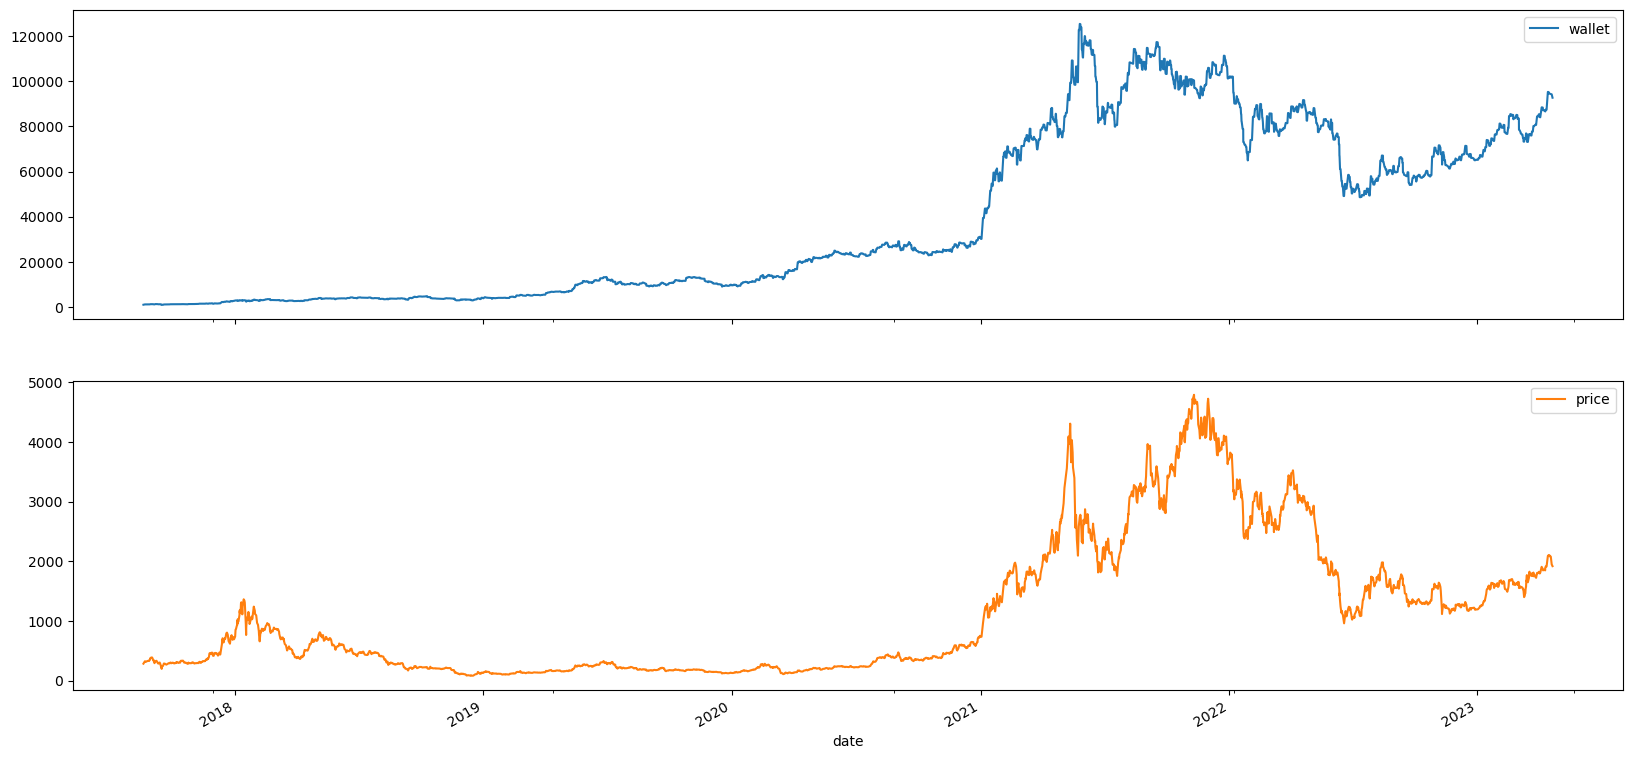

In [11]:

dt[['wallet', 'price']].plot(subplots=True, figsize=(20, 10))
print("\n----- Plot -----")

### Formule avec moyen mobile simple

In [12]:
#Formule Trix

dfTest = df.copy()

# -- If you want to run your BackTest on a specific period, uncomment the line below --
#dfTest = df['2023-01-20':]

# -- Definition of dt, that will be the dataset to do your trades analyses --
dt = None
dt = pd.DataFrame(columns = ['date','position', 'reason', 'price', 'frais' ,'fiat', 'coins', 'wallet', 'drawBack'])

# -- You can change variables below --
usdt = 1000
makerFee = 0.001
takerFee = 0.001

# -- Do not touch these values --
initalWallet = usdt
wallet = usdt
coin = 0
lastAth = 0
previousRow = dfTest.iloc[0]
stopLoss = 0
takeProfit = 500000
buyReady = True
sellReady = True

# -- Condition to BUY market --
def buyCondition(row, previousRow):
    if previousRow['SMAL'] <= previousRow['SMAH'] and row['SMAL'] > row['SMAH']:
        return True
    else:
        return False

# -- Condition de vente sur le marché --
def sellCondition(row, previousRow):
    if previousRow['SMAL'] >= previousRow['SMAH'] and row['SMAL'] < row['SMAH']:
        return True
    else:
        return False

# -- Iteration on all your price dataset (df) --
for index, row in dfTest.iterrows():
  # -- Buy market order --
  if buyCondition(row, previousRow) and usdt > 0 and buyReady == True:
    # -- You can define here at what price you buy --
    buyPrice = row['close']

    # -- Define the price of you SL and TP or comment it if you don't want a SL or TP --
   # stopLoss = buyPrice - 0.2 * buyPrice
   # takeProfit = buyPrice + 0.15 * buyPrice

    coin = usdt / buyPrice
    fee = takerFee * coin
    coin = coin - fee
    usdt = 0
    wallet = coin * row['close']

    # -- Check if your wallet hit a new ATH to know the drawBack --
    if wallet > lastAth:
      lastAth = wallet

    # -- You can uncomment the line below if you want to see logs --
    # print("Buy COIN at",buyPrice,'$ the', index)

    # -- Add the trade to DT to analyse it later --
    myrow = {'date': index, 'position': "Buy", 'reason':'Buy Market Order','price': buyPrice,'frais': fee * row['close'],'fiat': usdt,'coins': coin,'wallet': wallet,'drawBack':(wallet-lastAth)/lastAth}
    dt = dt.append(myrow,ignore_index=True)
  
  # -- Stop Loss --

    # -- Check if your wallet hit a new ATH to know the drawBack --
    if wallet > lastAth:
      lastAth = wallet
      
    # -- You can uncomment the line below if you want to see logs --
    # print("Sell COIN at Stop Loss",sellPrice,'$ the', index)
 

  # -- Sell Market Order --
  elif sellCondition(row, previousRow) and coin > 0 and sellReady == True:

    # -- You can define here at what price you buy --
    sellPrice = row['close']
    usdt = coin * sellPrice
    fee = takerFee * usdt
    usdt = usdt - fee
    coin = 0
    buyReady = True
    wallet = usdt

    # -- Check if your wallet hit a new ATH to know the drawBack --
    if wallet > lastAth:
      lastAth = wallet

    # -- You can uncomment the line below if you want to see logs --  
    # print("Sell COIN at",sellPrice,'$ the', index)

    # -- Add the trade to DT to analyse it later --
    myrow = {'date': index,'position': "Sell", 'reason':'Sell Market Order','price': sellPrice,'frais': fee,'fiat': usdt,'coins': coin,'wallet': wallet,'drawBack':(wallet-lastAth)/lastAth}
    dt = dt.append(myrow,ignore_index=True)
  
  previousRow = row

# -- BackTest Analyses --
dt = dt.set_index(dt['date'])
dt.index = pd.to_datetime(dt.index)
dt['resultat'] = dt['wallet'].diff()
dt['resultat%'] = dt['wallet'].pct_change()*100
dt.loc[dt['position']=='Buy','resultat'] = None
dt.loc[dt['position']=='Buy','resultat%'] = None

dt['tradeIs'] = ''
dt.loc[dt['resultat']>0,'tradeIs'] = 'Good'
dt.loc[dt['resultat']<=0,'tradeIs'] = 'Bad'

iniClose = dfTest.iloc[0]['close']
lastClose = dfTest.iloc[len(dfTest)-1]['close']
holdPercentage = ((lastClose - iniClose)/iniClose) * 100
algoPercentage = ((wallet - initalWallet)/initalWallet) * 100
vsHoldPercentage = ((algoPercentage - holdPercentage)/holdPercentage) * 100

try:
    tradesPerformance = round(dt.loc[(dt['tradeIs'] == 'Good') | (dt['tradeIs'] == 'Bad'), 'resultat%'].sum()
            / dt.loc[(dt['tradeIs'] == 'Good') | (dt['tradeIs'] == 'Bad'), 'resultat%'].count(), 2)
except:
    tradesPerformance = 0
    print("/!\ There is no Good or Bad Trades in your BackTest, maybe a problem...")

try:
    totalGoodTrades = dt.groupby('tradeIs')['date'].nunique()['Good']
    AveragePercentagePositivTrades = round(dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].sum()
                                           / dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].count(), 2)
    idbest = dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].idxmax()
    bestTrade = str(
        round(dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].max(), 2))
except:
    totalGoodTrades = 0
    AveragePercentagePositivTrades = 0
    idbest = ''
    bestTrade = 0
    print("/!\ There is no Good Trades in your BackTest, maybe a problem...")

try:
    totalBadTrades = dt.groupby('tradeIs')['date'].nunique()['Bad']
    AveragePercentageNegativTrades = round(dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].sum()
                                           / dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].count(), 2)
    idworst = dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].idxmin()
    worstTrade = round(dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].min(), 2)
except:
    totalBadTrades = 0
    AveragePercentageNegativTrades = 0
    idworst = ''
    worstTrade = 0
    print("/!\ There is no Bad Trades in your BackTest, maybe a problem...")

totalTrades = totalBadTrades + totalGoodTrades
winRateRatio = (totalGoodTrades/totalTrades) * 100

reasons = dt['reason'].unique()

dt

,date,position,reason,price,frais,fiat,coins,wallet,drawBack,resultat,resultat%,tradeIs
date,,,,,,,,,,,,
2017-08-18 11:00:00,2017-08-18 11:00:00,Buy,Buy Market Order,307.78,1.000000,0,3.245825,999.000000,0.000000,NaN,NaN,
2017-08-18 15:00:00,2017-08-18 15:00:00,Sell,Sell Market Order,298.80,0.969852,968.88264,0.000000,968.882640,-0.030148,-30.117360,-3.014751,Bad
2017-08-19 21:00:00,2017-08-19 21:00:00,Buy,Buy Market Order,293.25,0.968883,0,3.300644,967.913757,-0.031117,NaN,NaN,
2017-08-22 02:00:00,2017-08-22 02:00:00,Sell,Sell Market Order,312.99,1.033068,1032.035395,0.000000,1032.035395,0.000000,64.121638,6.624726,Good
2017-08-22 18:00:00,2017-08-22 18:00:00,Buy,Buy Market Order,310.77,1.032035,0,3.317577,1031.003359,-0.001000,NaN,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-17 05:00:00,2023-04-17 05:00:00,Sell,Sell Market Order,2102.05,33.804628,33770.822946,0.000000,33770.822946,-0.475006,-453.859751,-1.326118,Bad
2023-04-18 06:00:00,2023-04-18 06:00:00,Buy,Buy Market Order,2104.65,33.770823,0,16.029768,33737.052123,-0.475531,NaN,NaN,
2023-04-18 20:00:00,2023-04-18 20:00:00,Sell,Sell Market Order,2093.36,33.556076,33522.519961,0.000000,33522.519961,-0.478866,-214.532162,-0.635895,Bad


In [13]:
print("Pair Symbol :",pairName)
print("Period : [" + str(dfTest.index[0]) + "] -> [" +
      str(dfTest.index[len(dfTest)-1]) + "]")
print("Starting balance :", initalWallet, "$")

print("\n----- General Informations -----")
print("Final balance :", round(wallet, 2), "$")
print("Performance vs US Dollar :", round(algoPercentage, 2), "%")
print("Buy and Hold Performence :", round(holdPercentage, 2), "%")
print("Performance vs Buy and Hold :", round(vsHoldPercentage, 2), "%")
print("Best trade : +"+bestTrade, "%, the", idbest)
print("Worst trade :", worstTrade, "%, the", idworst)
print("Worst drawBack :", str(100*round(dt['drawBack'].min(), 2)), "%")
print("Total fees : ", round(dt['frais'].sum(), 2), "$")

print("\n----- Trades Informations -----")
print("Total trades on period :",totalTrades)
print("Number of positive trades :", totalGoodTrades)
print("Number of negative trades : ", totalBadTrades)
print("Trades win rate ratio :", round(winRateRatio, 2), '%')
print("Average trades performance :",tradesPerformance,"%")
print("Average positive trades :", AveragePercentagePositivTrades, "%")
print("Average negative trades :", AveragePercentageNegativTrades, "%")
diff = dfTest.index[len(dfTest)-1] - dfTest.index[0]
jours = diff.days
print("nombre de trade par jours potentiel :", totalTrades/jours)
      
print("\n----- Trades Reasons -----")
reasons = dt['reason'].unique()
for r in reasons:
    print(r+" number :", dt.groupby('reason')['date'].nunique()[r])

Pair Symbol : ETHUSDT
Period : [2017-08-17 04:00:00] -> [2023-04-21 13:00:00]
Starting balance : 1000 $

----- General Informations -----
Final balance : 33444.15 $
Performance vs US Dollar : 3244.42 %
Buy and Hold Performence : 535.02 %
Performance vs Buy and Hold : 506.41 %
Best trade : +48.17 %, the 2017-12-14 15:00:00
Worst trade : -19.96 %, the 2017-11-29 20:00:00
Worst drawBack : -68.0 %
Total fees :  41187.12 $

----- Trades Informations -----
Total trades on period : 1183
Number of positive trades : 419
Number of negative trades :  764
Trades win rate ratio : 35.42 %
Average trades performance : 0.51 %
Average positive trades : 4.68 %
Average negative trades : -1.78 %
nombre de trade par jours potentiel : 0.5706705258080077

----- Trades Reasons -----
Buy Market Order number : 1183
Sell Market Order number : 1183



----- Plot -----


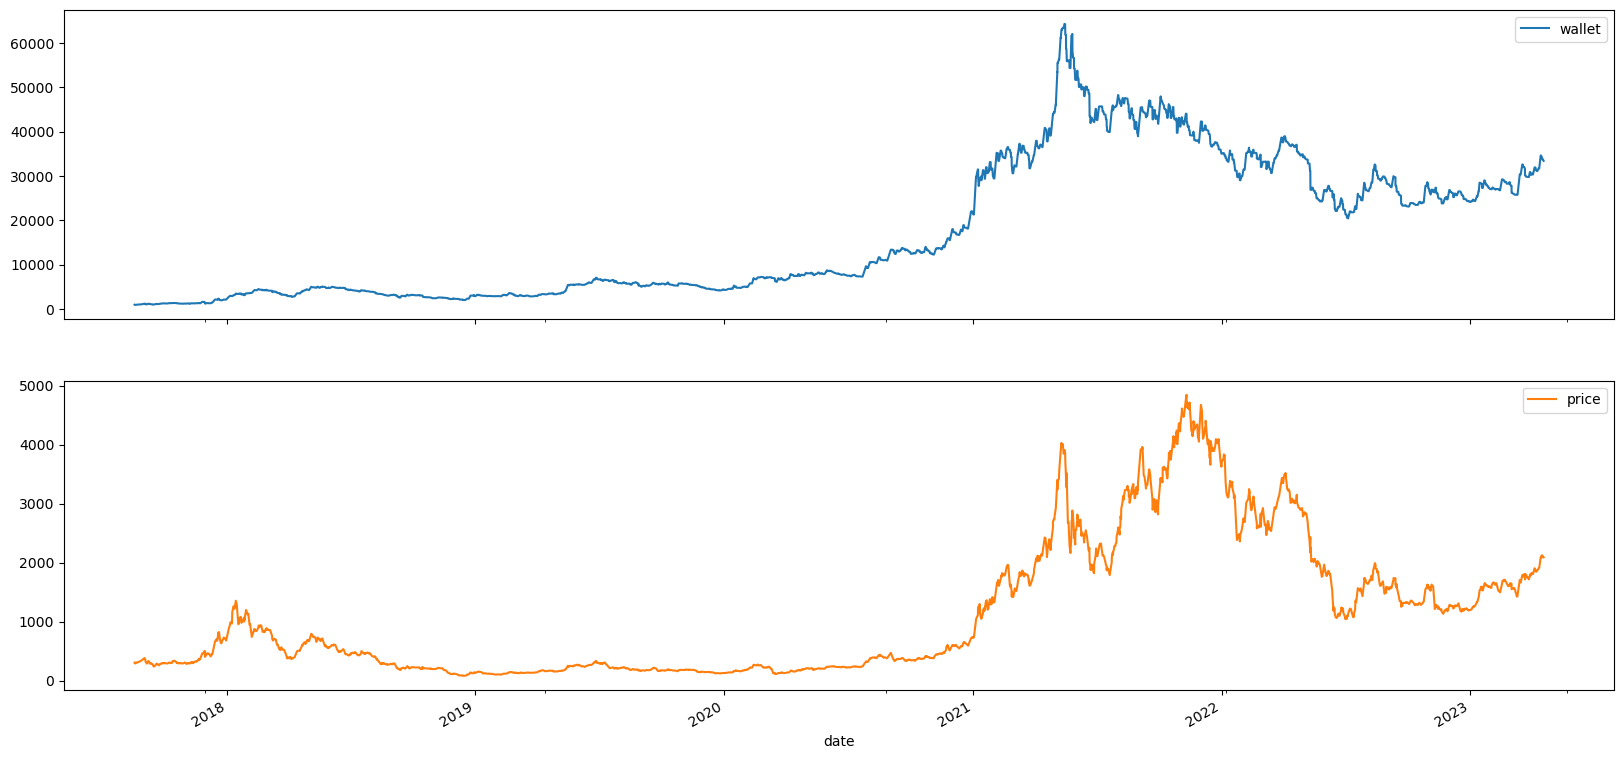

In [14]:

dt[['wallet', 'price']].plot(subplots=True, figsize=(20, 10))
print("\n----- Plot -----")

### Optimisateur maison du supertrend

        i        result
10  110.0  24355.781808
9   100.0  25318.360575
8    90.0  26746.087947
11  120.0  27057.262347
7    80.0  27194.324763
22  230.0  27440.192421
20  210.0  27814.670476
12  130.0  27840.747240
21  220.0  28145.561142
19  200.0  29109.524604
6    70.0  31464.868901
14  150.0  31901.481802
13  140.0  32310.788671
18  190.0  33587.298937
17  180.0  34752.048800
23  240.0  35162.040156
16  170.0  38701.847789
25  260.0  38865.186840
24  250.0  40052.640368
26  270.0  41541.221090
15  160.0  41786.734843
5    60.0  42939.671884
4    50.0  43361.392987
3    40.0  43834.969522
1    20.0  45355.280611
0    10.0  45380.029324
2    30.0  45702.756184
27  280.0  46092.147115
28  290.0  57510.027866


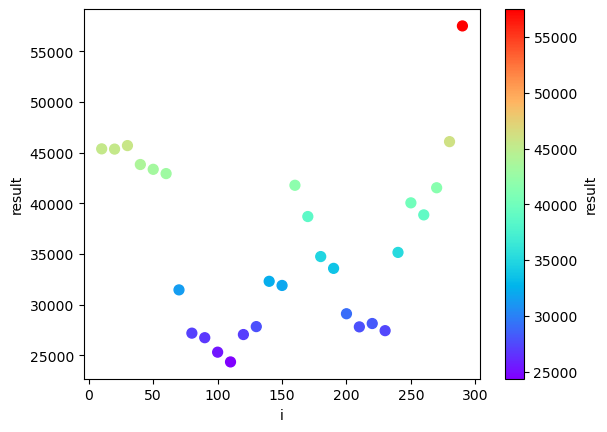

In [15]:
dt = None
dt = pd.DataFrame(columns = ['i', 'result'])
count=0

for i in range(10,300,10):
  
      df['EMA50']=ta.trend.sma_indicator(df['close'], i)

      dfTest = df.copy()
      usdt = 1000
      coin = 0
      fee = 0.0007
      wallet = 1000

      for index, row in dfTest.iterrows():
          #BUY
          if row['SUPER_TREND_DIRECTION1']+row['SUPER_TREND_DIRECTION2']+row['SUPER_TREND_DIRECTION3'] >= 1 and row['STOCH_RSI'] < 0.8 and row['close']>row['EMA50'] and usdt > 0:
              buyPrice = row['close']
              coin = usdt/buyPrice
              coin = coin - fee*coin
              usdt = 0
              wallet = coin * row['close']
              #print("buy btc at ",df['close'][index]," || ",df['timestamp'][index], " || I have ",fiat,"$ and ",btc," btc")
          #SELL
          if row['SUPER_TREND_DIRECTION1']+row['SUPER_TREND_DIRECTION2']+row['SUPER_TREND_DIRECTION3'] < 1 and row['STOCH_RSI'] > 0.2 and coin > 0:
              sellPrice = row['close']
              usdt = coin*sellPrice
              usdt = usdt - fee*usdt
              coin = 0
              wallet = usdt
              #print("sell btc at ",df['close'][index]," || ",df['timestamp'][index], "|| I have ",fiat,"$ and ",btc," btc")
      myrow = {'i': i,'result': wallet}
      dt = dt.append(myrow,ignore_index=True) 
print(dt.sort_values(by=['result']))
dt.plot.scatter(x='i',y=1,c='result',s=50,colormap='rainbow') 
plt.show()    

### Formule SuperTrend

In [16]:


dfTest = df.copy()

# -- If you want to run your BackTest on a specific period, uncomment the line below --
#dfTest = df['2023-01-20':]

# -- Definition of dt, that will be the dataset to do your trades analyses --
dt = None
dt = pd.DataFrame(columns = ['date','position', 'reason', 'price', 'frais' ,'fiat', 'coins', 'wallet', 'drawBack'])


# -- You can change variables below --
usdt = 1000
makerFee = 0.001
takerFee = 0.001

# -- Do not touch these values --
initalWallet = usdt
wallet = usdt
coin = 0
lastAth = 0
previousRow = dfTest.iloc[0]
stopLoss = 0
takeProfit = 500000
buyReady = True
sellReady = True

# -- Condition to BUY market --
def buyCondition(row, previousRow):
    if row['SUPER_TREND_DIRECTION1']+row['SUPER_TREND_DIRECTION2']+row['SUPER_TREND_DIRECTION3'] >= 1 and row['STOCH_RSI'] < 0.8 and row['close']>row['EMA120'] and usdt > 0:
        return True
    else:
        return False

# -- Condition de vente sur le marché --
def sellCondition(row, previousRow):
    if  row['SUPER_TREND_DIRECTION1']+row['SUPER_TREND_DIRECTION2']+row['SUPER_TREND_DIRECTION3'] < 1 and row['STOCH_RSI'] > 0.21 and coin > 0:
        return True
    else:
        return False

# -- Iteration on all your price dataset (df) --
for index, row in dfTest.iterrows():
  # -- Buy market order --
  if buyCondition(row, previousRow) and usdt > 0 and buyReady == True:
    # -- You can define here at what price you buy --
    buyPrice = row['close']

    # -- Define the price of you SL and TP or comment it if you don't want a SL or TP --
   # stopLoss = buyPrice - 0.2 * buyPrice
   # takeProfit = buyPrice + 0.15 * buyPrice

    coin = usdt / buyPrice
    fee = takerFee * coin
    coin = coin - fee
    usdt = 0
    wallet = coin * row['close']

    # -- Check if your wallet hit a new ATH to know the drawBack --
    if wallet > lastAth:
      lastAth = wallet

    # -- You can uncomment the line below if you want to see logs --
    # print("Buy COIN at",buyPrice,'$ the', index)

    # -- Add the trade to DT to analyse it later --
    myrow = {'date': index, 'position': "Buy", 'reason':'Buy Market Order','price': buyPrice,'frais': fee * row['close'],'fiat': usdt,'coins': coin,'wallet': wallet,'drawBack':(wallet-lastAth)/lastAth}
    dt = dt.append(myrow,ignore_index=True)
  
  # -- Stop Loss --

    # -- Check if your wallet hit a new ATH to know the drawBack --
    if wallet > lastAth:
      lastAth = wallet
      
    # -- You can uncomment the line below if you want to see logs --
    # print("Sell COIN at Stop Loss",sellPrice,'$ the', index)
 

  # -- Sell Market Order --
  elif sellCondition(row, previousRow) and coin > 0 and sellReady == True:

    # -- You can define here at what price you buy --
    sellPrice = row['close']
    usdt = coin * sellPrice
    fee = takerFee * usdt
    usdt = usdt - fee
    coin = 0
    buyReady = True
    wallet = usdt

    # -- Check if your wallet hit a new ATH to know the drawBack --
    if wallet > lastAth:
      lastAth = wallet

    # -- You can uncomment the line below if you want to see logs --  
    # print("Sell COIN at",sellPrice,'$ the', index)

    # -- Add the trade to DT to analyse it later --
    myrow = {'date': index,'position': "Sell", 'reason':'Sell Market Order','price': sellPrice,'frais': fee,'fiat': usdt,'coins': coin,'wallet': wallet,'drawBack':(wallet-lastAth)/lastAth}
    dt = dt.append(myrow,ignore_index=True)
  
  previousRow = row

# -- BackTest Analyses --
dt = dt.set_index(dt['date'])
dt.index = pd.to_datetime(dt.index)
dt['resultat'] = dt['wallet'].diff()
dt['resultat%'] = dt['wallet'].pct_change()*100
dt.loc[dt['position']=='Buy','resultat'] = None
dt.loc[dt['position']=='Buy','resultat%'] = None

dt['tradeIs'] = ''
dt.loc[dt['resultat']>0,'tradeIs'] = 'Good'
dt.loc[dt['resultat']<=0,'tradeIs'] = 'Bad'

iniClose = dfTest.iloc[0]['close']
lastClose = dfTest.iloc[len(dfTest)-1]['close']
holdPercentage = ((lastClose - iniClose)/iniClose) * 100
algoPercentage = ((wallet - initalWallet)/initalWallet) * 100
vsHoldPercentage = ((algoPercentage - holdPercentage)/holdPercentage) * 100

try:
    tradesPerformance = round(dt.loc[(dt['tradeIs'] == 'Good') | (dt['tradeIs'] == 'Bad'), 'resultat%'].sum()
            / dt.loc[(dt['tradeIs'] == 'Good') | (dt['tradeIs'] == 'Bad'), 'resultat%'].count(), 2)
except:
    tradesPerformance = 0
    print("/!\ There is no Good or Bad Trades in your BackTest, maybe a problem...")

try:
    totalGoodTrades = dt.groupby('tradeIs')['date'].nunique()['Good']
    AveragePercentagePositivTrades = round(dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].sum()
                                           / dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].count(), 2)
    idbest = dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].idxmax()
    bestTrade = str(
        round(dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].max(), 2))
except:
    totalGoodTrades = 0
    AveragePercentagePositivTrades = 0
    idbest = ''
    bestTrade = 0
    print("/!\ There is no Good Trades in your BackTest, maybe a problem...")

try:
    totalBadTrades = dt.groupby('tradeIs')['date'].nunique()['Bad']
    AveragePercentageNegativTrades = round(dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].sum()
                                           / dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].count(), 2)
    idworst = dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].idxmin()
    worstTrade = round(dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].min(), 2)
except:
    totalBadTrades = 0
    AveragePercentageNegativTrades = 0
    idworst = ''
    worstTrade = 0
    print("/!\ There is no Bad Trades in your BackTest, maybe a problem...")

totalTrades = totalBadTrades + totalGoodTrades
winRateRatio = (totalGoodTrades/totalTrades) * 100

reasons = dt['reason'].unique()

dt

,date,position,reason,price,frais,fiat,coins,wallet,drawBack,resultat,resultat%,tradeIs
date,,,,,,,,,,,,
2017-08-22 06:00:00,2017-08-22 06:00:00,Buy,Buy Market Order,305.37,1.000000,0,3.271441,999.000000,0.000000,NaN,NaN,
2017-09-02 06:00:00,2017-09-02 06:00:00,Sell,Sell Market Order,367.60,1.202582,1201.379204,0.000000,1201.379204,0.000000,202.379204,20.258179,Good
2017-09-06 15:00:00,2017-09-06 15:00:00,Buy,Buy Market Order,335.00,1.201379,0,3.582620,1200.177825,-0.001000,NaN,NaN,
2017-09-08 16:00:00,2017-09-08 16:00:00,Sell,Sell Market Order,296.06,1.060671,1059.609917,0.000000,1059.609917,-0.118005,-140.567908,-11.712257,Bad
2017-09-12 08:00:00,2017-09-12 08:00:00,Buy,Buy Market Order,308.00,1.059610,0,3.436852,1058.550307,-0.118887,NaN,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-12 04:00:00,2023-04-12 04:00:00,Sell,Sell Market Order,1867.65,22.544560,22522.015779,0.000000,22522.015779,-0.626296,-277.003015,-1.214978,Bad
2023-04-12 18:00:00,2023-04-12 18:00:00,Buy,Buy Market Order,1902.94,22.522016,0,11.823543,22499.493763,-0.626670,NaN,NaN,
2023-04-17 14:00:00,2023-04-17 14:00:00,Sell,Sell Market Order,2078.04,24.569796,24545.226424,0.000000,24545.226424,-0.592725,2045.732661,9.092350,Good


In [17]:
print("Pair Symbol :",pairName)
print("Period : [" + str(dfTest.index[0]) + "] -> [" +
      str(dfTest.index[len(dfTest)-1]) + "]")
print("Starting balance :", initalWallet, "$")

print("\n----- General Informations -----")
print("Final balance :", round(wallet, 2), "$")
print("Performance vs US Dollar :", round(algoPercentage, 2), "%")
print("Buy and Hold Performence :", round(holdPercentage, 2), "%")
print("Performance vs Buy and Hold :", round(vsHoldPercentage, 2), "%")
print("Best trade : +"+bestTrade, "%, the", idbest)
print("Worst trade :", worstTrade, "%, the", idworst)
print("Worst drawBack :", str(100*round(dt['drawBack'].min(), 2)), "%")
print("Total fees : ", round(dt['frais'].sum(), 2), "$")

print("\n----- Trades Informations -----")
print("Total trades on period :",totalTrades)
print("Number of positive trades :", totalGoodTrades)
print("Number of negative trades : ", totalBadTrades)
print("Trades win rate ratio :", round(winRateRatio, 2), '%')
print("Average trades performance :",tradesPerformance,"%")
print("Average positive trades :", AveragePercentagePositivTrades, "%")
print("Average negative trades :", AveragePercentageNegativTrades, "%")
diff = dfTest.index[len(dfTest)-1] - dfTest.index[0]
jours = diff.days
print("nombre de trade par jours potentiel :", totalTrades/jours)
      
print("\n----- Trades Reasons -----")
reasons = dt['reason'].unique()
for r in reasons:
    print(r+" number :", dt.groupby('reason')['date'].nunique()[r])

Pair Symbol : ETHUSDT
Period : [2017-08-17 04:00:00] -> [2023-04-21 13:00:00]
Starting balance : 1000 $

----- General Informations -----
Final balance : 23160.62 $
Performance vs US Dollar : 2216.06 %
Buy and Hold Performence : 535.02 %
Performance vs Buy and Hold : 314.2 %
Best trade : +62.89 %, the 2021-01-04 12:00:00
Worst trade : -12.53 %, the 2022-02-24 07:00:00
Worst drawBack : -74.0 %
Total fees :  12399.87 $

----- Trades Informations -----
Total trades on period : 351
Number of positive trades : 136
Number of negative trades :  215
Trades win rate ratio : 38.75 %
Average trades performance : 1.35 %
Average positive trades : 8.5 %
Average negative trades : -3.17 %
nombre de trade par jours potentiel : 0.16931982633863965

----- Trades Reasons -----
Buy Market Order number : 351
Sell Market Order number : 351



----- Plot -----


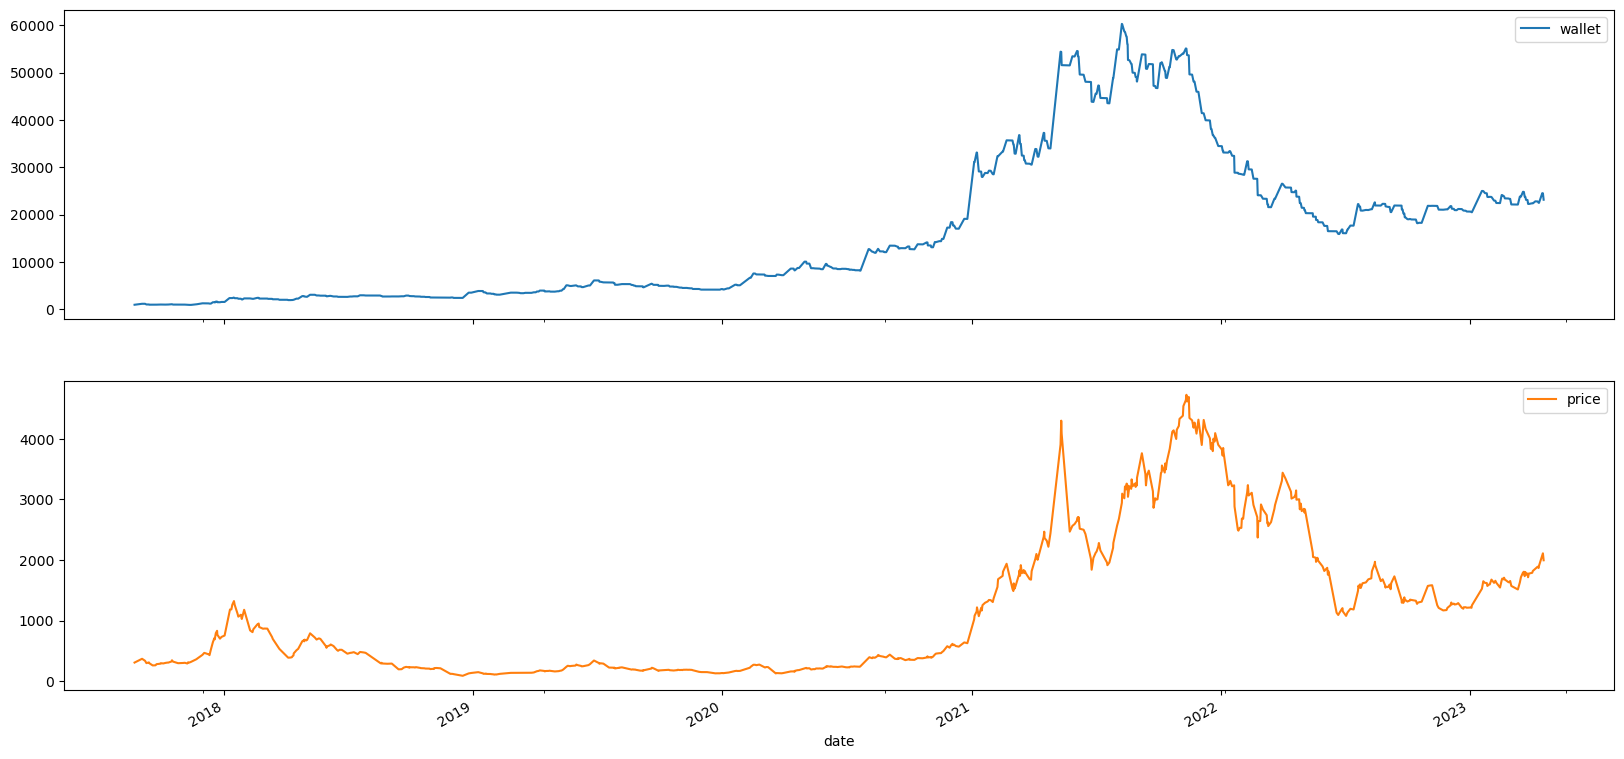

In [18]:

dt[['wallet', 'price']].plot(subplots=True, figsize=(20, 10))
print("\n----- Plot -----")

### Formule MACD

In [19]:
# Formule MACD
dfTest = df.copy()

# -- If you want to run your BackTest on a specific period, uncomment the line below --
#dfTest = df['2023-01-20':]

# -- Definition of dt, that will be the dataset to do your trades analyses --
dt = None
dt = pd.DataFrame(columns = ['date','position', 'reason', 'price', 'frais' ,'fiat', 'coins', 'wallet', 'drawBack'])

# -- You can change variables below --
usdt = 1000
makerFee = 0.000
takerFee = 0.000

# -- Do not touch these values --
initalWallet = usdt
wallet = usdt
coin = 0
lastAth = 0
previousRow = dfTest.iloc[0]
stopLoss = 0
takeProfit = 500000
buyReady = True
sellReady = True

# -- Condition to BUY market --
def buyCondition(row, previousRow):
    if (row['TRIX_HISTO'] > 0 and row['STOCH_RSI'] < 0.82 and df.loc[row.name, 'MACD'] < 0 and df.loc[previousRow.name, 'MACD'] > 0):
        return True
    else:
        return False



def sellCondition(row, previousRow):
    if (row['TRIX_HISTO'] < 0 and row['STOCH_RSI'] > 0.23 and df.at[row.name, 'MACD'] > 0 and df.at[previousRow.name, 'MACD'] < 0):
        return True
    else:
        return False


# -- Iteration on all your price dataset (df) --
for index, row in dfTest.iterrows():
  # -- Buy market order --
  if buyCondition(row, previousRow) and usdt > 0 and buyReady == True:
    # -- You can define here at what price you buy --
    buyPrice = row['close']

    # -- Define the price of you SL and TP or comment it if you don't want a SL or TP --
   # stopLoss = buyPrice - 0.2 * buyPrice
   # takeProfit = buyPrice + 0.15 * buyPrice

    coin = usdt / buyPrice
    fee = takerFee * coin
    coin = coin - fee
    usdt = 0
    wallet = coin * row['close']

    # -- Check if your wallet hit a new ATH to know the drawBack --
    if wallet > lastAth:
      lastAth = wallet

    # -- You can uncomment the line below if you want to see logs --
    # print("Buy COIN at",buyPrice,'$ the', index)

    # -- Add the trade to DT to analyse it later --
    myrow = {'date': index, 'position': "Buy", 'reason':'Buy Market Order','price': buyPrice,'frais': fee * row['close'],'fiat': usdt,'coins': coin,'wallet': wallet,'drawBack':(wallet-lastAth)/lastAth}
    dt = dt.append(myrow,ignore_index=True)
  
  # -- Stop Loss --

    # -- Check if your wallet hit a new ATH to know the drawBack --
    if wallet > lastAth:
      lastAth = wallet
      
    # -- You can uncomment the line below if you want to see logs --
    # print("Sell COIN at Stop Loss",sellPrice,'$ the', index)
 

  # -- Sell Market Order --
  elif sellCondition(row, previousRow) and coin > 0 and sellReady == True:

    # -- You can define here at what price you buy --
    sellPrice = row['close']
    usdt = coin * sellPrice
    fee = takerFee * usdt
    usdt = usdt - fee
    coin = 0
    buyReady = True
    wallet = usdt

    # -- Check if your wallet hit a new ATH to know the drawBack --
    if wallet > lastAth:
      lastAth = wallet

    # -- You can uncomment the line below if you want to see logs --  
    # print("Sell COIN at",sellPrice,'$ the', index)

    # -- Add the trade to DT to analyse it later --
    myrow = {'date': index,'position': "Sell", 'reason':'Sell Market Order','price': sellPrice,'frais': fee,'fiat': usdt,'coins': coin,'wallet': wallet,'drawBack':(wallet-lastAth)/lastAth}
    dt = dt.append(myrow,ignore_index=True)
  
  previousRow = row

# -- BackTest Analyses --
dt = dt.set_index(dt['date'])
dt.index = pd.to_datetime(dt.index)
dt['resultat'] = dt['wallet'].diff()
dt['resultat%'] = dt['wallet'].pct_change()*100
dt.loc[dt['position']=='Buy','resultat'] = None
dt.loc[dt['position']=='Buy','resultat%'] = None

dt['tradeIs'] = ''
dt.loc[dt['resultat']>0,'tradeIs'] = 'Good'
dt.loc[dt['resultat']<=0,'tradeIs'] = 'Bad'

iniClose = dfTest.iloc[0]['close']
lastClose = dfTest.iloc[len(dfTest)-1]['close']
holdPercentage = ((lastClose - iniClose)/iniClose) * 100
algoPercentage = ((wallet - initalWallet)/initalWallet) * 100
vsHoldPercentage = ((algoPercentage - holdPercentage)/holdPercentage) * 100

try:
    tradesPerformance = round(dt.loc[(dt['tradeIs'] == 'Good') | (dt['tradeIs'] == 'Bad'), 'resultat%'].sum()
            / dt.loc[(dt['tradeIs'] == 'Good') | (dt['tradeIs'] == 'Bad'), 'resultat%'].count(), 2)
except:
    tradesPerformance = 0
    print("/!\ There is no Good or Bad Trades in your BackTest, maybe a problem...")

try:
    totalGoodTrades = dt.groupby('tradeIs')['date'].nunique()['Good']
    AveragePercentagePositivTrades = round(dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].sum()
                                           / dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].count(), 2)
    idbest = dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].idxmax()
    bestTrade = str(
        round(dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].max(), 2))
except:
    totalGoodTrades = 0
    AveragePercentagePositivTrades = 0
    idbest = ''
    bestTrade = 0
    print("/!\ There is no Good Trades in your BackTest, maybe a problem...")

try:
    totalBadTrades = dt.groupby('tradeIs')['date'].nunique()['Bad']
    AveragePercentageNegativTrades = round(dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].sum()
                                           / dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].count(), 2)
    idworst = dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].idxmin()
    worstTrade = round(dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].min(), 2)
except:
    totalBadTrades = 0
    AveragePercentageNegativTrades = 0
    idworst = ''
    worstTrade = 0
    print("/!\ There is no Bad Trades in your BackTest, maybe a problem...")

totalTrades = totalBadTrades + totalGoodTrades
winRateRatio = (totalGoodTrades/totalTrades) * 100

reasons = dt['reason'].unique()

dt

,date,position,reason,price,frais,fiat,coins,wallet,drawBack,resultat,resultat%,tradeIs
date,,,,,,,,,,,,
2017-10-04 12:00:00,2017-10-04 12:00:00,Buy,Buy Market Order,289.02,0.0,0,3.459968,1000.000000,0.000000,NaN,NaN,
2017-10-11 18:00:00,2017-10-11 18:00:00,Sell,Sell Market Order,303.55,0.0,1050.273337,0.000000,1050.273337,0.000000,50.273337,5.027334,Good
2017-10-19 06:00:00,2017-10-19 06:00:00,Buy,Buy Market Order,303.49,0.0,0,3.460652,1050.273337,0.000000,NaN,NaN,
2017-10-27 02:00:00,2017-10-27 02:00:00,Sell,Sell Market Order,296.96,0.0,1027.675279,0.000000,1027.675279,-0.021516,-22.598059,-2.151636,Bad
2017-10-27 14:00:00,2017-10-27 14:00:00,Buy,Buy Market Order,294.15,0.0,0,3.493712,1027.675279,-0.021516,NaN,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-11 18:00:00,2023-03-11 18:00:00,Sell,Sell Market Order,1448.59,0.0,832.13414,0.000000,832.134140,-0.585854,12.850317,1.568482,Good
2023-03-31 11:00:00,2023-03-31 11:00:00,Buy,Buy Market Order,1792.89,0.0,0,0.464130,832.134140,-0.585854,NaN,NaN,
2023-04-01 22:00:00,2023-04-01 22:00:00,Sell,Sell Market Order,1823.28,0.0,846.239052,0.000000,846.239052,-0.578834,14.104912,1.695029,Good


In [20]:
print("Pair Symbol :",pairName)
print("Period : [" + str(dfTest.index[0]) + "] -> [" +
      str(dfTest.index[len(dfTest)-1]) + "]")
print("Starting balance :", initalWallet, "$")

print("\n----- General Informations -----")
print("Final balance :", round(wallet, 2), "$")
print("Performance vs US Dollar :", round(algoPercentage, 2), "%")
print("Buy and Hold Performence :", round(holdPercentage, 2), "%")
print("Performance vs Buy and Hold :", round(vsHoldPercentage, 2), "%")
print("Best trade : +"+bestTrade, "%, the", idbest)
print("Worst trade :", worstTrade, "%, the", idworst)
print("Worst drawBack :", str(100*round(dt['drawBack'].min(), 2)), "%")
print("Total fees : ", round(dt['frais'].sum(), 2), "$")

print("\n----- Trades Informations -----")
print("Total trades on period :",totalTrades)
print("Number of positive trades :", totalGoodTrades)
print("Number of negative trades : ", totalBadTrades)
print("Trades win rate ratio :", round(winRateRatio, 2), '%')
print("Average trades performance :",tradesPerformance,"%")
print("Average positive trades :", AveragePercentagePositivTrades, "%")
print("Average negative trades :", AveragePercentageNegativTrades, "%")
diff = dfTest.index[len(dfTest)-1] - dfTest.index[0]
jours = diff.days
print("nombre de trade par jours potentiel :", totalTrades/jours)
      
print("\n----- Trades Reasons -----")
reasons = dt['reason'].unique()
for r in reasons:
    print(r+" number :", dt.groupby('reason')['date'].nunique()[r])

Pair Symbol : ETHUSDT
Period : [2017-08-17 04:00:00] -> [2023-04-21 13:00:00]
Starting balance : 1000 $

----- General Informations -----
Final balance : 974.58 $
Performance vs US Dollar : -2.54 %
Buy and Hold Performence : 535.02 %
Performance vs Buy and Hold : -100.48 %
Best trade : +76.44 %, the 2021-09-07 02:00:00
Worst trade : -58.22 %, the 2018-03-20 16:00:00
Worst drawBack : -88.0 %
Total fees :  0.0 $

----- Trades Informations -----
Total trades on period : 89
Number of positive trades : 57
Number of negative trades :  32
Trades win rate ratio : 64.04 %
Average trades performance : 2.12 %
Average positive trades : 11.14 %
Average negative trades : -13.95 %
nombre de trade par jours potentiel : 0.04293294741919923

----- Trades Reasons -----
Buy Market Order number : 89
Sell Market Order number : 89



----- Plot -----


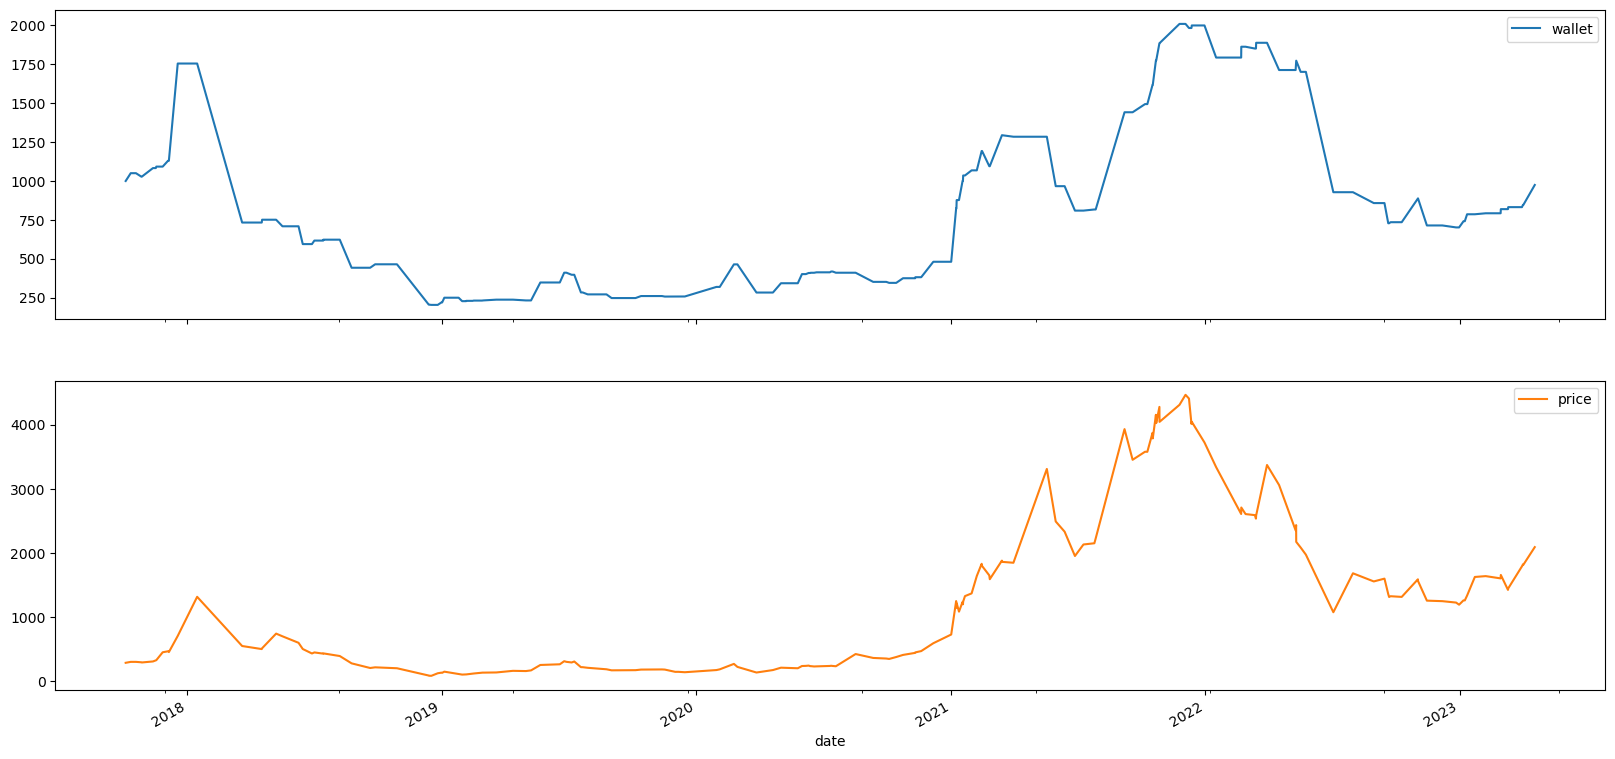

In [21]:

dt[['wallet', 'price']].plot(subplots=True, figsize=(20, 10))
print("\n----- Plot -----")
